In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
import matplotlib.pyplot as plt




In [3]:
df = pd.read_csv('fog_aware_stats_pivot.csv')

df['Label_train'] = 1*(df['Label']=='foggy')

X = np.array(df.drop(['Label', 'Label_train', 'photo', 'site', 'mc_0','mc_1', 'mc_2', 'mc_3', 'dark_channel_prior_0','dark_channel_prior_1','dark_channel_prior_2','dark_channel_prior_3'], axis=1))
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

y = np.array(df['Label_train'])



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [5]:
df[['Label_train', 'Label']].value_counts()

Label_train  Label    
0            not_foggy    6851
1            foggy        1776
dtype: int64

In [19]:
'''model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)

scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

# Tracking training epochs
train_scores = []
test_scores = []

best_test_score = 0
patience = 5  # Set the patience for early stopping

for epoch in range(1, 101):  # Set the number of desired epochs
    model.fit(X_train, y_train)
    
    # Evaluate on training set
    train_score = model.score(X_train, y_train)
    train_scores.append(train_score)
    
    # Evaluate on test set
    test_score = model.score(X_test, y_test)
    test_scores.append(test_score)

     # Early stopping check
    if test_score > best_test_score:
        best_test_score = test_score
        patience = 5  # Reset patience if there's improvement
    else:
        patience -= 1

    if patience == 0:
        print(f"Early stopping at epoch {epoch}.")
        break
    
    # Print or log training progress
    print(f"Epoch {epoch}/{30} - Train Accuracy: {train_score:.4f} - Test Accuracy: {test_score:.4f}")



Epoch 1/30 - Train Accuracy: 0.9737 - Test Accuracy: 0.9262
Epoch 2/30 - Train Accuracy: 0.9737 - Test Accuracy: 0.9262
Epoch 3/30 - Train Accuracy: 0.9737 - Test Accuracy: 0.9262
Epoch 4/30 - Train Accuracy: 0.9737 - Test Accuracy: 0.9262
Epoch 5/30 - Train Accuracy: 0.9737 - Test Accuracy: 0.9262
Early stopping at epoch 6.


In [23]:
'''# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.88991889 0.91135574 0.94898551 0.91072464 0.9257971 ]
Mean CV Score: 0.9173563739567066


In [6]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(model, X_scaled, y, cv=5)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.9281575898030128
Precision: 0.8637316561844863
Recall: 0.7729831144465291
F1 Score: 0.8158415841584159
AUC-ROC Score: 0.9624573846007841


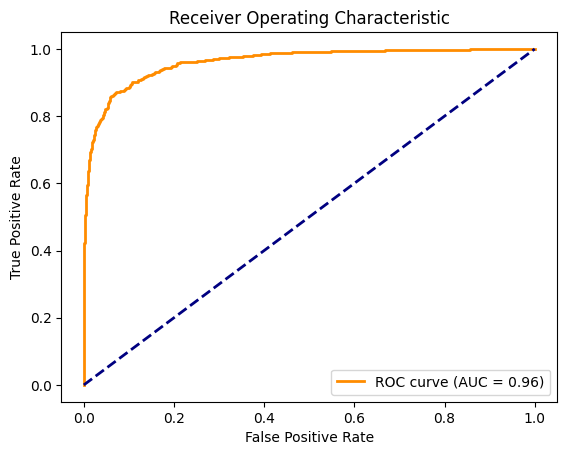

In [7]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Plotting training progress
plt.plot(range(1, 101), train_scores, label='Train Accuracy')
plt.plot(range(1, 101), test_scores, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

                    Feature  Importance
13  coef_or_var_sharpness_0    0.009849
21              color_sat_0    0.004789
26                     CF_1    0.003167
15  coef_or_var_sharpness_2    0.002781
14  coef_or_var_sharpness_1    0.002433
9               sharpness_0    0.002433
24              color_sat_3    0.002356
5            vertical_var_0    0.001622
22              color_sat_1    0.001622
25                     CF_0    0.001545
23              color_sat_2    0.001429
27                     CF_2    0.001390
7            vertical_var_2    0.000966
6            vertical_var_1    0.000888
18                entropy_1    0.000734
2                mscn_var_1    0.000695
28                     CF_3    0.000618
8            vertical_var_3    0.000502
1                mscn_var_0    0.000463
11              sharpness_2   -0.000077
16  coef_or_var_sharpness_3   -0.000193
10              sharpness_1   -0.000386
19                entropy_2   -0.000657
17                entropy_0   -0.000695


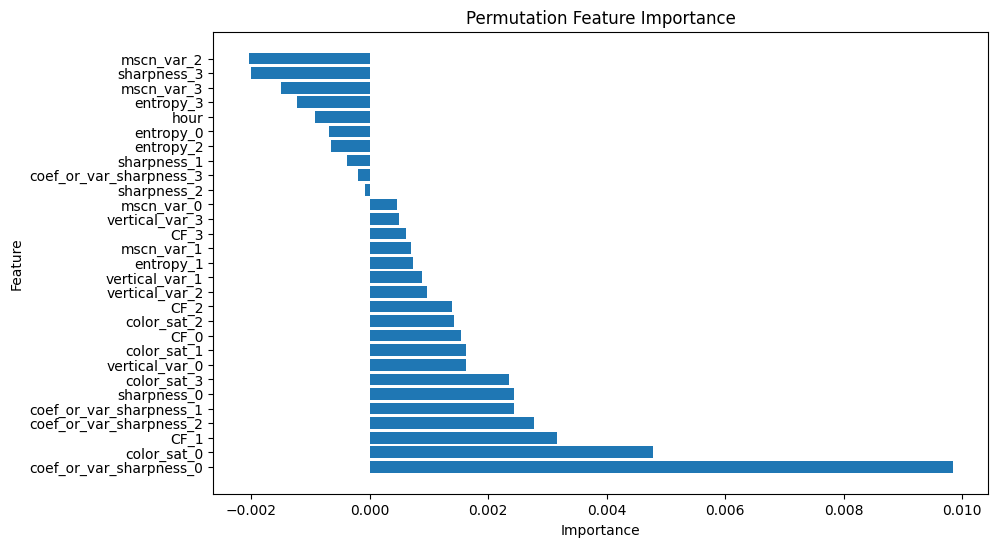

In [17]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
feature_importance = result.importances_mean

# Making a X_copy dataframe with all the feature columns
X_copy = df.drop(['Label', 'Label_train', 'photo', 'site', 'mc_0','mc_1', 'mc_2', 'mc_3', 'dark_channel_prior_0','dark_channel_prior_1','dark_channel_prior_2','dark_channel_prior_3'], axis=1)

# Get the feature names
feature_names = X_copy.columns

# Create a DataFrame to combine feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

In [19]:
%pip install shap

     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 950.3 kB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 10.7 MB/s eta 0:00:00
   --------------------------------------- 462.1/462.1 kB 14.1 MB/s eta 0:00:00
   ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


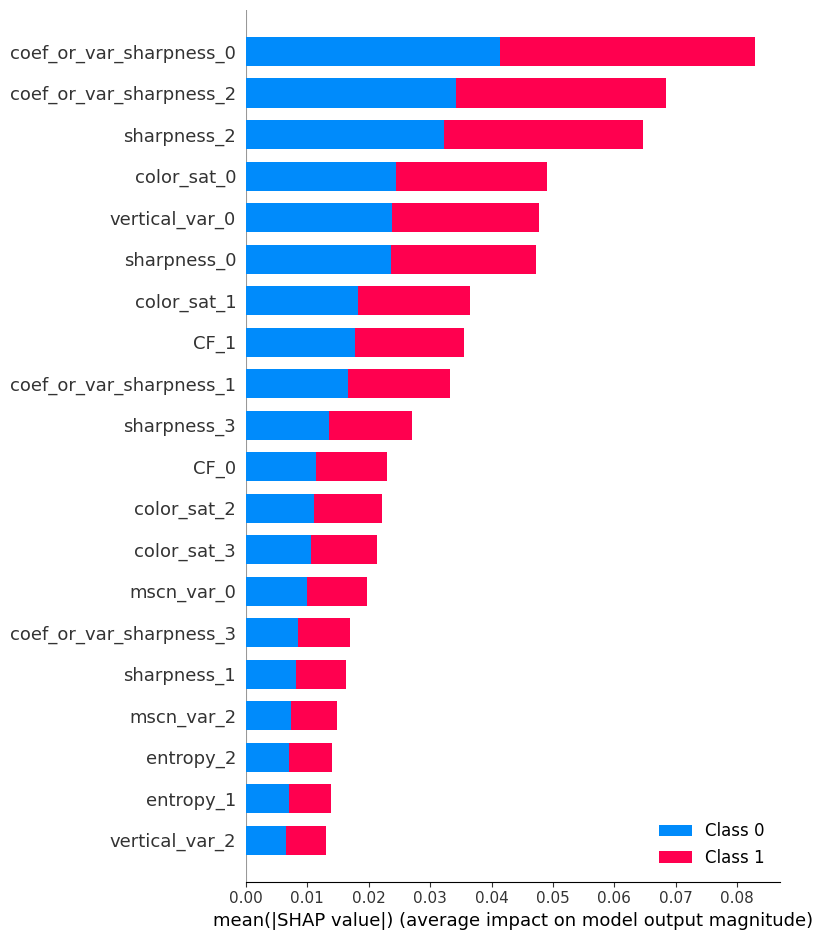

In [21]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_copy)